<a href="https://colab.research.google.com/github/steve122192/stock_portfolio_analysis/blob/master/Portfolio_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install yfinance
import yfinance as yf
import datetime
import pandas_datareader.data as web
%matplotlib inline
import matplotlib.pyplot as plt


In [16]:
top_holdings = ['PENN','TSLA','AMZN']
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2020, 9, 16)

In [17]:
df = web.DataReader(top_holdings,'yahoo',start=start,end=end)
df

Attributes  Adj Close              ...      Volume           
Symbols          PENN        TSLA  ...        TSLA       AMZN
Date                               ...                       
2019-01-02  19.450001   62.023998  ...  58293000.0  7983100.0
2019-01-03  19.940001   60.071999  ...  34826000.0  6975600.0
2019-01-04  21.180000   63.537998  ...  36970500.0  9182600.0
2019-01-07  22.510000   66.991997  ...  37756000.0  7993200.0
2019-01-08  23.190001   67.070000  ...  35042500.0  8881400.0
...               ...         ...  ...         ...        ...
2020-09-10  62.459999  371.339996  ...  84930600.0  5330700.0
2020-09-11  59.189999  372.720001  ...  60717500.0  5094000.0
2020-09-14  65.540001  419.619995  ...  83020600.0  4529600.0
2020-09-15  68.230003  449.760010  ...  97298200.0  4021500.0
2020-09-16  67.839996  441.760010  ...  72279300.0  4512200.0

[431 rows x 18 columns]

In [18]:
close = df['Close']
close

Symbols,PENN,TSLA,AMZN
Date,,,
2019-01-02,19.450001,62.023998,1539.130005
2019-01-03,19.940001,60.071999,1500.280029
2019-01-04,21.180000,63.537998,1575.390015
2019-01-07,22.510000,66.991997,1629.510010
2019-01-08,23.190001,67.070000,1656.579956
...,...,...,...
2020-09-10,62.459999,371.339996,3175.110107
2020-09-11,59.189999,372.720001,3116.219971
2020-09-14,65.540001,419.619995,3102.969971


In [41]:
(close['TSLA'].pct_change()+1).cumprod()-1

Date
2019-01-02         NaN
2019-01-03   -0.031472
2019-01-04    0.024410
2019-01-07    0.080098
2019-01-08    0.081356
                ...   
2020-09-10    4.987037
2020-09-11    5.009287
2020-09-14    5.765446
2020-09-15    6.251387
2020-09-16    6.122405
Name: TSLA, Length: 431, dtype: float64

In [39]:
((close['TSLA'].pct_change()+1).cumprod()-1)*100

Date
2019-01-02           NaN
2019-01-03     -3.147168
2019-01-04      2.440991
2019-01-07      8.009800
2019-01-08      8.135563
                 ...    
2020-09-10    498.703738
2020-09-11    500.928692
2020-09-14    576.544574
2020-09-15    625.138692
2020-09-16    612.240459
Name: TSLA, Length: 431, dtype: float64

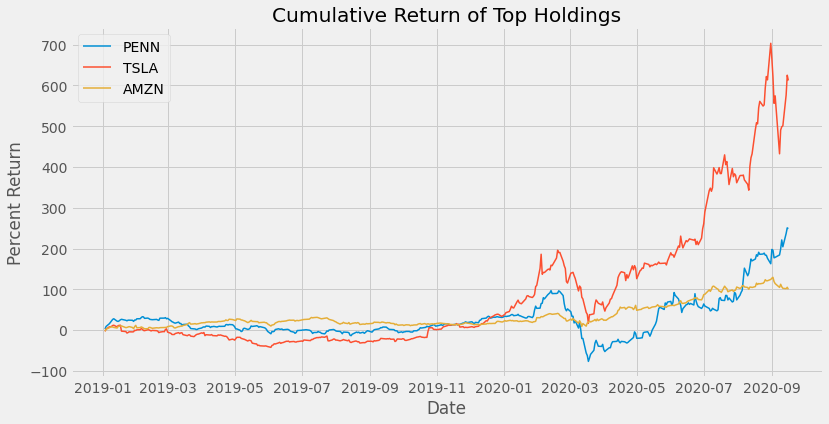

In [53]:
fig, ax = plt.subplots(figsize=(12,6))
plt.style.use('fivethirtyeight')
for ticker in top_holdings:
  ax.plot(((close[ticker].pct_change()+1).cumprod()-1)*100, linewidth=1.5, label=ticker)
ax.legend()
plt.title('Cumulative Return of Top Holdings')
plt.ylabel('Percent Return')
plt.xlabel('Date')
plt.show()
plt.close()

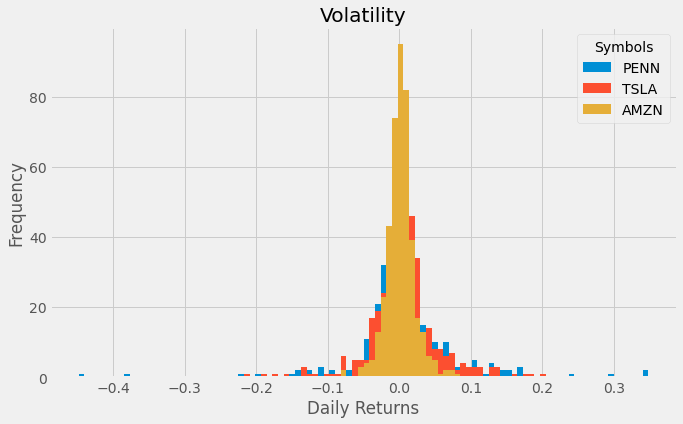

In [59]:
daily_returns = close.pct_change()
daily_returns.plot.hist(bins=100, figsize=(10,6))
plt.title('Volatility')
plt.xlabel('Daily Returns')
plt.show()

In [60]:
close['PENN']

Date
2019-01-02    19.450001
2019-01-03    19.940001
2019-01-04    21.180000
2019-01-07    22.510000
2019-01-08    23.190001
                ...    
2020-09-10    62.459999
2020-09-11    59.189999
2020-09-14    65.540001
2020-09-15    68.230003
2020-09-16    67.839996
Name: PENN, Length: 431, dtype: float64

In [61]:
import numpy as np
import plotly.graph_objects as go

In [62]:
penn_data = web.DataReader('PENN','yahoo',start=start,end=end)
penn_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,19.740000,18.280001,18.500000,19.450001,2580900,19.450001
2019-01-03,20.290001,19.120001,19.230000,19.940001,2998100,19.940001
2019-01-04,21.420000,20.330000,20.360001,21.180000,2910300,21.180000
2019-01-07,22.629999,20.760000,21.000000,22.510000,4561900,22.510000
2019-01-08,23.260000,22.209999,22.790001,23.190001,3036500,23.190001
...,...,...,...,...,...,...
2020-09-10,65.790001,60.930000,61.299999,62.459999,20658500,62.459999
2020-09-11,63.919998,57.639999,63.270000,59.189999,9485000,59.189999
2020-09-14,65.940002,59.410000,60.220001,65.540001,11293000,65.540001


In [64]:
candle = {
    'x': penn_data.index,
    'open': penn_data.Open,
    'close': penn_data.Close,
    'high': penn_data.High,
    'low': penn_data.Low,
    'type': 'candlestick',
    'name': 'Microsoft',
    'showlegend': False
}

data = [candle]
# Config graph layout
layout = go.Layout({
    'title': {
        'text': 'MSFT',
        'font': {
            'size': 15
        }
    }
})


In [65]:
fig = go.Figure(data=data, layout=layout)
fig.write_html("./MSFT-web.html")
fig.show()